In [ ]:
!pip install -U "tensorflow>=2.5"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 14 kB/s 
     |████████████████████████████████| 1.7 MB 35.5 MB/s 
     |████████████████████████████████| 438 kB 44.7 MB/s 
     |████████████████████████████████| 5.9 MB 47.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import os
import pathlib
import matplotlib
import matplotlib.pyplot as plt
import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen
import tensorflow as tf
import tensorflow_hub as hub
tf.get_logger().setLevel('ERROR')

In [ ]:
def load_image_into_numpy_array(path):
  image = None
  if(path.startswith('http')):
    response = urlopen(path)
    image_data = response.read()
    image_data = BytesIO(image_data)
    image = Image.open(image_data)
  else:
    image_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(image_data))

  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)
  
My_Model = {'SSD MobileNet v2 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2' , 
            'SSD MobileNet V2 FPNLite 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1'}

Image_to_Test = {'Brids' : 'https://upload.wikimedia.org/wikipedia/commons/0/09/The_smaller_British_birds_%288053836633%29.jpg'}

COCO17_HUMAN_POSE_KEYPOINTS = [(0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (0, 5),
 (0, 6),
 (5, 7),
 (7, 9),
 (6, 8),
 (8, 10),
 (5, 6),
 (5, 11),
 (6, 12),
 (11, 12),
 (11, 13),
 (13, 15),
 (12, 14),
 (14, 16)]

In [ ]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3529, done.
remote: Counting objects: 100% (3529/3529), done.
remote: Compressing objects: 100% (2944/2944), done.
remote: Total 3529 (delta 932), reused 1493 (delta 531), pack-reused 0
Receiving objects: 100% (3529/3529), 47.00 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (932/932), done.


In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696507 sha256=846702666bd51b6586679a0851cd335e81f4cc74249a067fa0353fe65eb53d53
  Stored in directory: /tmp/pip-ephem-wheel-cache-h3x7yk9m/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=65c8cd201b12d9b1b54a7dbdc693a0dd7ad138afeb29f53aee233e367203711c
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580a



  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [ ]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:
Model_Name1 = 'SSD MobileNet V2 FPNLite 640x640'
Model_link = My_Model[Model_Name1]
model1 = hub.load(Model_link)

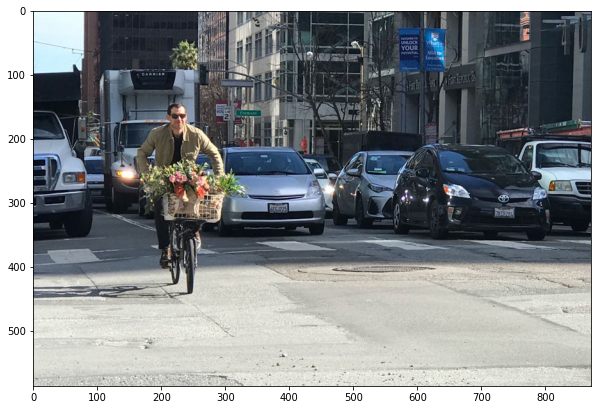

In [ ]:
flip_image_horizontally = False 
convert_image_to_grayscale = False

image_path = "./image.jpeg"
image_np = load_image_into_numpy_array(image_path)

if(flip_image_horizontally):
  image_np[0] = np.fliplr(image_np[0]).copy()

if(convert_image_to_grayscale):
  image_np[0] = np.tile(
    np.mean(image_np[0], 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(image_np[0])
plt.show()

In [ ]:
detect = model1(image_np)

result = {key:value.numpy() for key,value in detect.items()}
print(result.keys())

dict_keys(['num_detections', 'detection_multiclass_scores', 'raw_detection_boxes', 'detection_boxes', 'detection_classes', 'detection_anchor_indices', 'raw_detection_scores', 'detection_scores'])


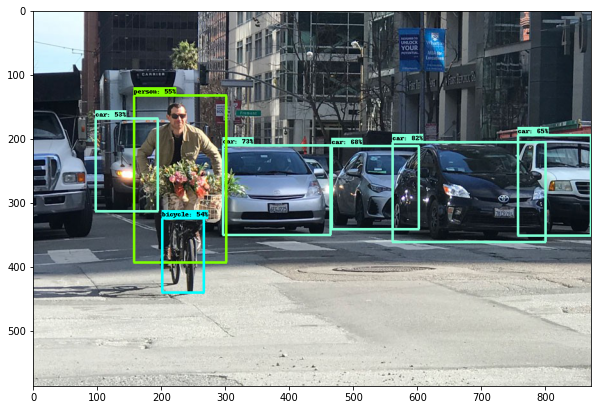

In [ ]:
label_id_offset = 0
image_np_with_detections = image_np.copy()

# Use keypoints if available in detections
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=10,
      min_score_thresh=.50,
      agnostic_mode=False,
      keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)

plt.figure(figsize=(10,10))
plt.imshow(image_np_with_detections[0])
plt.show()

In [ ]:
import cv2
im = cv2.imread('image.jpeg')
print(im.shape)

(586, 872, 3)


In [ ]:
classes = [cls for cls in result['detection_classes'][result['detection_scores'] > 0.50]]
classes = [category_index.get(cls)['name'] for cls in classes]
classes_box = [cls for cls in result['detection_boxes'][result['detection_scores'] > 0.50]]
width = im.shape[1]
width_object = (classes_box[4][3] * width + classes_box[4][1]*width) / 2

In [ ]:
i = 0
for box in classes_box:
  width_object = (box[3] * width + box[1]*width) / 2 # xmin*width and xmax*width
  if width_object < width/2 :
    print("{} in Left".format(classes[i]))
  else:
    print("{} in Right".format(classes[i]))
  i += 1


car in Right
car in Left
car in Right
car in Right
person in Left
bicycle in Left
car in Left
